# Document Clustering for a Cryptocurrency Document Set

Programming Language: R 4.11.0 in Jupyter Notebook

R Libraries used:
- ggplot2
- mvtnorm
- reshape2
- tidyverse
- tm
- SnowballC

## EM for Document Clustering

### I. Deriving Expectation and Maximization:

The expectation-maximization algorithm is a method that iteratively computes the maximum likelihood of the estimates of parameters of the observed data points where each observation belongs to one of a set of unobserved latent variables. This algorithm works by executing the following steps:

**E-Step**: This step creates a function to compute the expectation of the log-likelihood based on the current estimate of the parameters. (Wikipedia Contributors, 2019a)

**M-Step**: This step finds the parameters that maximise the expected log-likelihood derived from the E-step. The latent variables are redistributed in the next iteration based on the maximisation of the expected log-likelihood. (Wikipedia Contributors, 2019a)

Let us derive the expectation and maximization for the Hard EM algorithm.

Objective: To compute the MLE/MAP estimate with the hidden/latent variables.
Consider that we have a set of observed data values representing a collection of documents as follows:

$$
X=\left\{x_1, x_2, \ldots x_n\right\}
$$

We need to classify these documents into their respective clusters. We must find the estimate for each document to be assigned a cluster id that indicates the cluster it belongs to. Since the cluster ids of the documents are unknown, they can be considered as latent variables.

Therefore, let us consider a set of latent or hidden variables as follows:

$$
Z=\left\{z_1, z_2, \ldots z_n\right\}
$$


To assign a cluster id to a document, we need to compute the probability or likelihood of that document belonging to that cluster. A set of documents and their corresponding latent variables represent the complete data, and they are given as follows:

$$
D=(X, Z)=\left(\left\{x_1, z_1\right\}, \left\{x_2, z_2\right\}, \ldots .\left\{x_n, z_n\right\}\right)
$$

, where X is the set of observed variables and Z is the set of latent variables. Both sets of
variables have a one-to-one correspondence with each other.

Let θ be a vector of unknown parameters.<br>
Let $𝑞_𝑛$ represent the complete data.

In derivative terms, the EM algorithm aims to estimate the hidden variable for each document to construct the complete data and maximize the expected complete loglikelihood with respect to θ.
This algorithm performs an iterative process. Each iteration contains the following steps:

#### 1. E-Step:

- Fix parameter vector θ and optimize {𝑞𝑛}. Note that 𝜃 is initialized with ϕ, μ values for each cluster.
- Construct the tight lower bound that is the expectation term. This term will represent the posterior probability in the log space.
- Assign the clusters to the latent variables having the maximum posterior probability. i.e., $𝑍_𝑛~𝑞_𝑛$

We derive the tight lower bound as follows:

$$
Q\left(\theta, q_n\right)=\sum_{z_n} q_n\left(z_n\right) \log \frac{P\left(x_n, z_n \mid \theta\right)}{q_n\left(z_n\right)}
$$

Using the chain rule, we get:

$$
\begin{aligned}
& =\sum_{z_n} q_n\left(z_n\right) \log \frac{P\left(z_n \mid x_n, \theta\right)}{q_n\left(z_n\right)}+\sum_{z_n} q_n\left(z_n\right) \log P\left(x_n \mid \theta\right) \\
& =K L\left(q_n\left(z_n\right), P\left(z_n \mid x_n, \theta\right)\right)+\log P\left(x_n \mid \theta\right)
\end{aligned}
$$

Given that the entropy = $− ∑𝑧 𝑞(𝑧)log 𝑔(𝑧)$,<br>
 ⇒ $(𝑞^*)_𝑛 = 𝑃(𝑧_𝑛 ∣ 𝑥_𝑛, 𝜃)$
 
Estimating the lower tight bound, we get:

$$
\begin{aligned}
Q\left(\theta,\left\{q_n^*\right\}\right) & =\sum_{n=1}^N \log \left(x_n \mid \theta\right) \\
& =\mathrm{L}(\theta)
\end{aligned}
$$

, where L(𝜃) is the likelihood of $\theta$.
Therefore, the expected log likelihood of the complete data D can be computed as:
 
$$
\begin{array}{r}
Q\left(\theta,\left\{q_n^*\right\}\right)=\sum^N \sum q_n^*\left(z_n\right) \log P\left(x_n, z_n \mid \theta\right)-\sum_{n=1}^N H\left(q_n\right) \\
=\sum_{n=1}^N E_{z_n \sim q_n^*}\left[\log P\left(x_n, z_n \mid \theta\right)\right]-\text { constant }
\end{array}
$$

#### 2. M-Step:

For $(𝑞^*)_𝑛$, optimise $\theta$ using the Q function as follows:

$$
\begin{aligned}
\theta^* & =\operatorname{argmax} Q_\theta\left(\theta,\left\{q_n^*\right\}\right) \\
& =\operatorname{argmax} \sum_{z=}^N E_{z n} \mid x_n, \theta
\end{aligned}
$$

For hard clustering, we can represent the above expression as follows:

**E-Step**:

$$
\begin{aligned}
q^*(z) & =\underset{q}{\operatorname{argmax}} Q(\theta, q(z)) \\
& =P(z / x, \theta)
\end{aligned}
$$

**M-Step:**

$$
\begin{aligned}
\theta^* & =\underset{\theta}{\operatorname{argmax}} Q\left(\theta,\left\{q_n^*\right\}\right) \\
& =\underset{\theta}{\operatorname{argmax}} Q(\theta, q(z)) \\
& =\underset{\theta}{\operatorname{argmax}} \sum_{n=1}^N E_z \mid x, \theta[\log P(x, z \mid \theta)]
\end{aligned}
$$

, where $\underset{q}{\operatorname{argmax}} Q(\theta, q(z))$ will give the cluster with the maximum probability for each document.

This is the cluster the document will be assigned to.

We are going to continue the derived form of the EM algorithm here. The goal is to demonstrate it in R given the data.

**Note**: Please change the file path given in the code to your local path if you are going to run the given code.

First, let us load the required libraries. The below code block will check whether the specified libraries are installed on the system and install them if they are not installed.

In [1]:
# Specifying the required packages
packages <- c("ggplot2", "reshape2", 'tidyverse', "tm", "SnowballC")

# Installing the required packages if not installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Loading the required packages
invisible(lapply(packages, library, character.only = TRUE))

# Disabling warnings
options(warn = -1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content




In [2]:
# Defining a random value of eps
eps <- 1e-10

Next, we define a function to read the text file and applies preprocessing to it. Each row of the file serves as the document that must be assigned a cluster. We will also set the initial and real values of the cluster labels.

In [3]:
# Function to read the data and perform preprocessing
read.data <- function(file.name='./SciCryptDocs.txt', sample.size = 1000, seed = 100, pre.proc = TRUE, spr.ratio = 0.90) {
  # INPUTS:
  ## file.name: name of the input .txt file
  ## sample.size: if == 0  reads all docs, otherwise only reads a subset of the corpus
  ## seed: random seed for sampling (read above)
  ## pre.proc: if TRUE performs the preprocessing (recommended)
  ## spr.ratio: is used to reduce the sparcity of data by removing very infrequent words
  # OUTPUTS:
  ## docs: the unlabled corpus (each row is a document)
  ## word.doc.mat: the count matrix (each rows and columns corresponds to words and documents, respectively)
  ## label: the real cluster labels (will be used in visualization/validation and not for clustering)

  # Reading the data
  text <- readLines(file.name)
  # select a subset of data if sample.size > 0
  if (sample.size > 0){
    set.seed(seed)
    text <- text[sample(length(text), sample.size)]
  }
  ## the terms before the first '\t' are the lables (the newsgroup names) and all the remaining text after '\t' are the actual documents
  docs <- strsplit(text, '\t')
  # store the labels for evaluation
  labels <-  unlist(lapply(docs, function(x) x[1]))
  # store the unlabeled texts
  docs <- data.frame(unlist(lapply(docs, function(x) x[2])))

  # Setting the column name for the documents
  colnames(docs) <- c('text')

  # Assigning a document id column for each document
  docs$doc_id  <- 1:nrow(docs)

  # Updating docs
  docs <- docs[c('doc_id','text')]

  library(tm)
  # create a corpus
  docs <- DataframeSource(docs)
  corp <- Corpus(docs)

  # Preprocessing the text in the documents:
  if (pre.proc){
    # Removing the stop words (the most common word in a language that can be find in any document)
    corp <- tm_map(corp, removeWords, stopwords("english"))

    # Removing the pnctuations
    corp <- tm_map(corp, removePunctuation)

    # Applying stemming (Reducing the inflected and derived words to their root form)
    corp <- tm_map(corp, stemDocument)

    # Removing all the numbers from the text
    corp <- tm_map(corp, removeNumbers)

    # Removing the redundant spaces from the text
    corp <- tm_map(corp, stripWhitespace)
  }

  # Create a matrix which its rows are the documents and colomns are the words.
  dtm <- DocumentTermMatrix(corp)

  # Reducing the sparcity of out dtm
  dtm <- removeSparseTerms(dtm, spr.ratio)

  # Converting dtm to a matrix
  word.doc.mat <- t(as.matrix(dtm))

  # Returning the result
  return (list("docs" = docs, "word.doc.mat"= word.doc.mat, "labels" = labels, "dtm" = dtm))
}

Next, we will set up a couple of preliminary functions to facilitate the EM operation. The first function will calculate the logSum computation for the cluster probabilities. The next function will setup the intial parameters `rho` and `mu` for the EM function.

In [4]:
## --- helper function ------------------------------------------------------------------
# Input:    logA1, logA2 ... logAn
# Output:   log(A1+A2+...+An)
#
# This function is needed to prevent numerical overflow/underflow when working with small numbers,
# because we can easily get small numbers by multiplying p1 * p2 * ... * pn (where 0 <= pi <= 1 are probabilities).
#
# Example: Suppose we are interested in p1*p2*p3 + q1*q2+q3 where all numbers are probabilities \in [0,1]
#          To prevent numerical errors, we do the computation in the log space and convert the result back using the exp function
#          Hence our approach is to form the vector v = [log(p1)+log(p2)+log(p3) , log(q1)+log(q2)+log(q3)]
#          Then get the results by: exp(logSum(v))
logSum <- function(v) {
  m = max(v)
  return ( m + log(sum(exp(v-m))))
}

In [5]:
##--- Initialize model parameters randomly --------------------------------------------
initial.param <- function(vocab_size, K=6, seed=123456){

  # Assuming that all clusters have the same size (we will update this later on)
  rho <- matrix(1/K, nrow = K, ncol=1)

  # Initialising the value of mu
  mu <- matrix(runif(K*vocab_size),nrow = K, ncol = vocab_size)

  # Applying normalization to ensure that sum of each row is 1
  mu <- prop.table(mu, margin = 1)
  return (list("rho" = rho, "mu"= mu))
}

### II. Implementing the Hard-EM and Soft-EM

Since the given code base function for the E-step is implementing soft-EM, we only need to accommodate the hard EM functionality by computing the max probability for each cluster if the type is `hard` instead of `soft`.

In [6]:
##--- E Step for Document Clustering  --------------------------------------------
# this function currently implements the E-step of the soft-EM
# Student needs to modify this function if wants to make it Hard-EM
#
E.step <- function(gamma, model, counts, type){

  # Model Parameter Settings

  # Storing the number of documents and the number of clusters
  N <- dim(counts)[2]
  K <- dim(model$mu)[1]

  # E-step iteration starts here:
  for (n in 1:N){
    for (k in 1:K){

      # Calculating the posterior based on the estimated mu and rho in the "log space"
      gamma[n,k] <- log(model$rho[k,1]) +  sum(counts[,n] * log(model$mu[k,]))
    }

    # Applying normalisation to sum to 1 in the log space
    logZ = logSum(gamma[n,])
    gamma[n,] <- gamma[n,] - logZ

  }

  # Converting back from the log space
  gamma <- exp(gamma)

  # Differentiating between soft and hard EM assignment
  if (type == "hard"){

    # Computing the binary proabability values based on max value obtained for a cluster
    max.prob <- gamma == apply(gamma, 1, max) # Finding the cluster with the maximum (estimated) probability
    gamma[max.prob] <- 1 # Assigning the highest probability to the cluster with maximum (estimated) probability
    gamma[!max.prob] <- 0 # Removing the points with lower probabilites
    return(gamma)

  }
  else{

    #Applying soft clustering
    return(gamma)
  }

}

The below function for the M-step will add eps to all the elements of the vector before normalising its sum to 1 to ensure uniform distribution.

In [7]:
##--- M Step for Document Clustering  --------------------------------------------
M.step <- function(gamma, model, counts){

  # Model Parameter Setting
  N <- dim(counts)[2]   # number of documents
  W <- dim(counts)[1]   # number of words i.e. vocabulary size
  K <- dim(model$mu)[1] # number of clusters


  # M step: Student needs to write this part for soft/hard EM
  #......
  #
  # hint: before you normalise a vector so that it sums to 1, first add a small number (eps) to all elements of the vector.
  # for example, suppose you have a vector [n1,n2,n3] and you want to normalise it to make it a probability distribution.
  # you first need to add eps to elements [n1+eps,n2+eps,n3+eps], then divide the elements by (n1+n2+n3+ 3*eps) so that the vecotr sums to 1.
  # this prevents NaN for vectors where all elements aer zero such as [0,0,0] because after adding eps you have [eps,eps,eps] which
  # results in the uniform distribution after normalisation.

  eps <- 0.001

  # M step:
  # Estimate mu for all k clusters
  for (k in 1:K){

    # Calculate mixing coefficient values rho_k (multinomial distribution) using posterior probabilities.
    Nk <- sum(gamma[,k])
    model$rho[k,1] = Nk / N

    # Calculating the word proportion parameter mu_k,w
    # Numerator = gamma_nk * c(w,d_n)
    mu.num <- c()

    # Denominator = sum of sum of gamma_nk * c(w',d_n) for words in a document from the dictionary
    mu.dn <- 0

    for(w in 1:W) {

      # Updating the numerator
      mu.num <- c(mu.num,sum(counts[w,] * gamma[,k]))

      # Updating the denominator
      mu.dn <-  mu.dn + sum(counts[w,] * gamma[,k])
    }
    model$mu[k,] <- mu.num/mu.dn

    # Normalising the vector mu
    model$mu[k,] <- (model$mu[k,] + eps)/(sum(model$mu[k, ]) + W*eps)
  }

  # Returning the result
  return (model)
}

The below EM function will execute the E-step and M-step functions and use subsequentely defined train objective function to compute the negative log likelihood of number of documents, given the trained model.

In [8]:
##--- EM for Document Clustering --------------------------------------------
EM <- function(counts, K=4, max.epoch=10, seed=123456, type){
  #INPUTS:
  ## counts: word count matrix
  ## K: the number of clusters
  #OUTPUTS:
  ## model: a list of model parameters

  # Model Parameter Setting
  N <- dim(counts)[2] # number of documents
  W <- dim(counts)[1] # number of unique words (in all documents)

  # Initialization
  model <- initial.param(W, K = K, seed = seed)
  gamma <- matrix(0, nrow = N, ncol = K)

  print(train_obj(model,counts))

  # Building the model
  for(epoch in 1:max.epoch){

    # Performing the E Step
    gamma <- E.step(gamma, model, counts, type)

    # Performing the M Step
    model <- M.step(gamma, model, counts)

    print(train_obj(model,counts))
  }
  # Return Model
  return(list("model"= model, "gamma" = gamma))
}

In [9]:
##--- the training objective function --------------------------------------------
# Input:
#    model:  the model object containing the mu and rho
#    counts: the word-document frequency matrix
# Output:
#    nloglike: the negative log-likelihood i.e. log P(counts|model)
#
train_obj <- function(model, counts) {
  N <- dim(counts)[2] # number of documents
  K <- dim(model$mu)[1]

  nloglike = 0
  for (n in 1:N){
    lprob <- matrix(0,ncol = 1, nrow=K)
    for (k in 1:K){
      lprob[k,1] <- sum(counts[,n] * log(model$mu[k,]))
    }
    nloglike <- nloglike - logSum(lprob + log(model$rho))
  }

  return (nloglike)
}

### III. Loading the Data and Running the Algorithms

Now, we must see all the above functions brought to fruition. First, we will call the `read.data` function and pass the given text file.

In [10]:
### main body ##################################################################

# Reading documents
## Note: sample.size=0 means all read all documents!
##(for develiopment and debugging use a smaller subset e.g., sample.size = 40)
data <- read.data(file.name='./SciCryptDocs.txt', sample.size=0, seed=100, pre.proc=TRUE, spr.ratio= .99)

Next, we will grab the word document frequency matrix and call the soft EM and hard EM algorithm versions of the EM function. Since, we must have 6 clusters, we can specify the number of clusters while calling the function.

In [11]:
# Grabbing the word-document frequency matrix
counts <- data$word.doc.mat

In [12]:
# Calling the EM algorithm on the data with Soft EM clustering
res.soft <- EM(counts, K = 6, max.epoch = 5, type = 'soft')

[1] 2173151
[1] 2005841
[1] 1987344
[1] 1979700
[1] 1977673
[1] 1976572


In [13]:
# Calling the EM algorithm on the data with Hard EM clustering
res.hard <- EM(counts, K = 6, max.epoch = 5, type = 'hard')

[1] 2171907
[1] 2005602
[1] 1987438
[1] 1979958
[1] 1977275
[1] 1976253


### IV. Performing and Visualizing PCA on the Clusters

Let us include the given function for visualising the clusters. We will modify it slightly so that it accepts the number of clusters and the colour to be assigned to each cluster.

In [14]:
##--- Cluster Visualization -------------------------------------------------
cluster.viz <- function(doc.word.mat, color.vector, title = ' ', k){
  p.comp <- prcomp(doc.word.mat, scale. = TRUE, center = TRUE)
  plot(p.comp$x, col = c(1:k)[as.numeric(color.vector)], pch = 1,  main = title)
}

In [15]:
# Normalizing the count matrix for better visualization since the dimensionality of the data (number of words) is large enough
counts <- scale(counts)

In [16]:
# Setting the plot sizes
options(repr.plot.width = 8, repr.plot.height = 8)

We have everything ready to visualise the clusters. So let us visualise them one by one. We have three different kinds of clusterings:

* Original
* Soft-EM
* Hard-EM

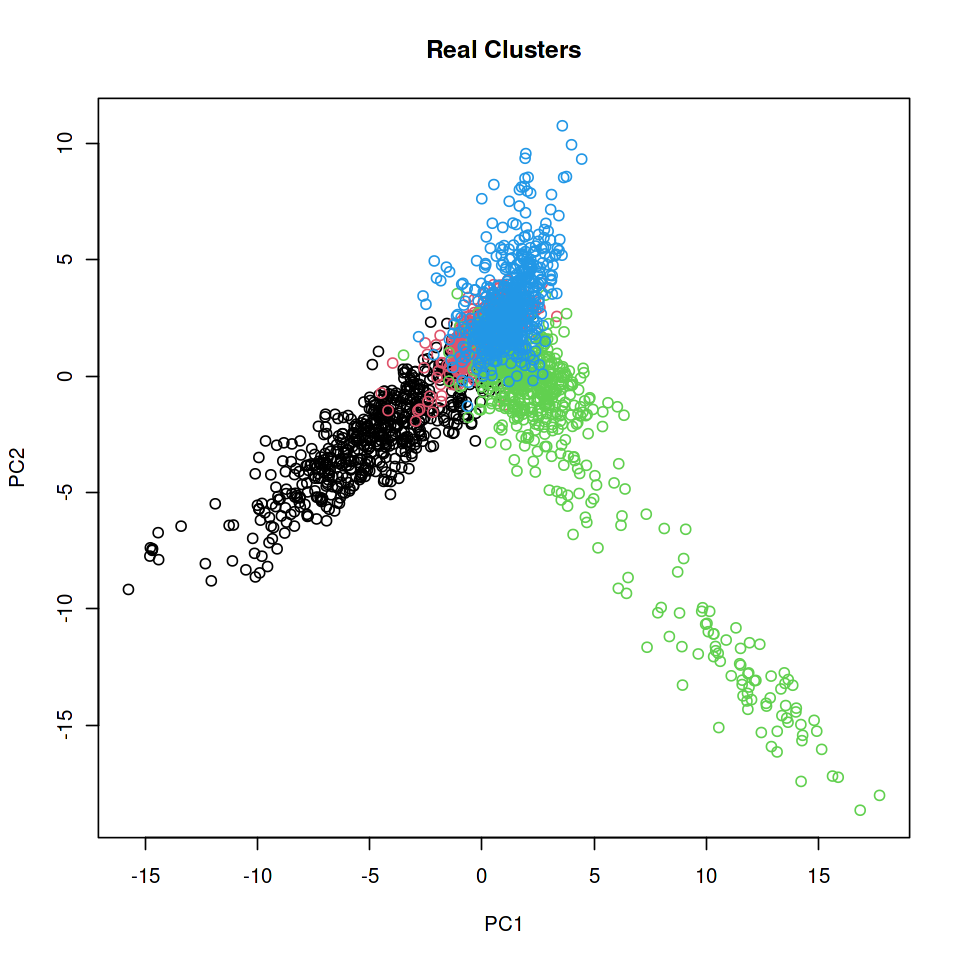

In [17]:
# Visualizing the real clusters
cluster.viz(t(counts), factor(data$label), 'Real Clusters', 6)

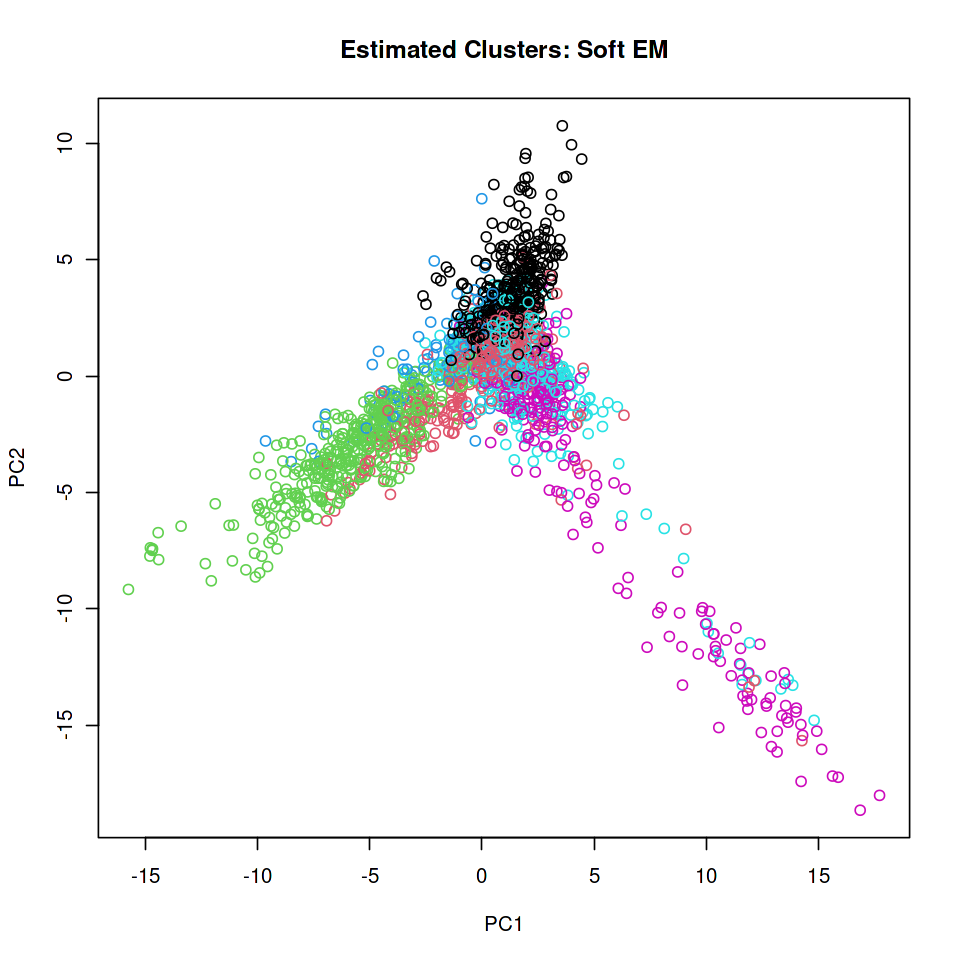

In [18]:
# Finding the cluster with the maximum probability (since we have soft assignment here)
label.soft.hat <- apply(res.soft$gamma, 1, which.max)

# Visualizing the estimated clusters for Soft-EM
cluster.viz(t(counts), label.soft.hat, 'Estimated Clusters: Soft EM', 6)

Observing the separation of the clusters generated by the Soft EM algorithm, there is a significant overlapping of the clusters. There is no clear separation of the clusters. Let us understand what Soft EM does.

The Soft EM algorithm performs fuzzy clustering on the given observations. This means that each document is not assigned to a single cluster. The probability of the document belonging to every cluster is computed instead. In other words, the log-likelihood in the E step is weighed upon all possible clusters for each document.

Because of this, each document has been assigned different probabilities of belonging to
each of the 6 clusters. Therefore, the clustering in the above plot is fuzzy.

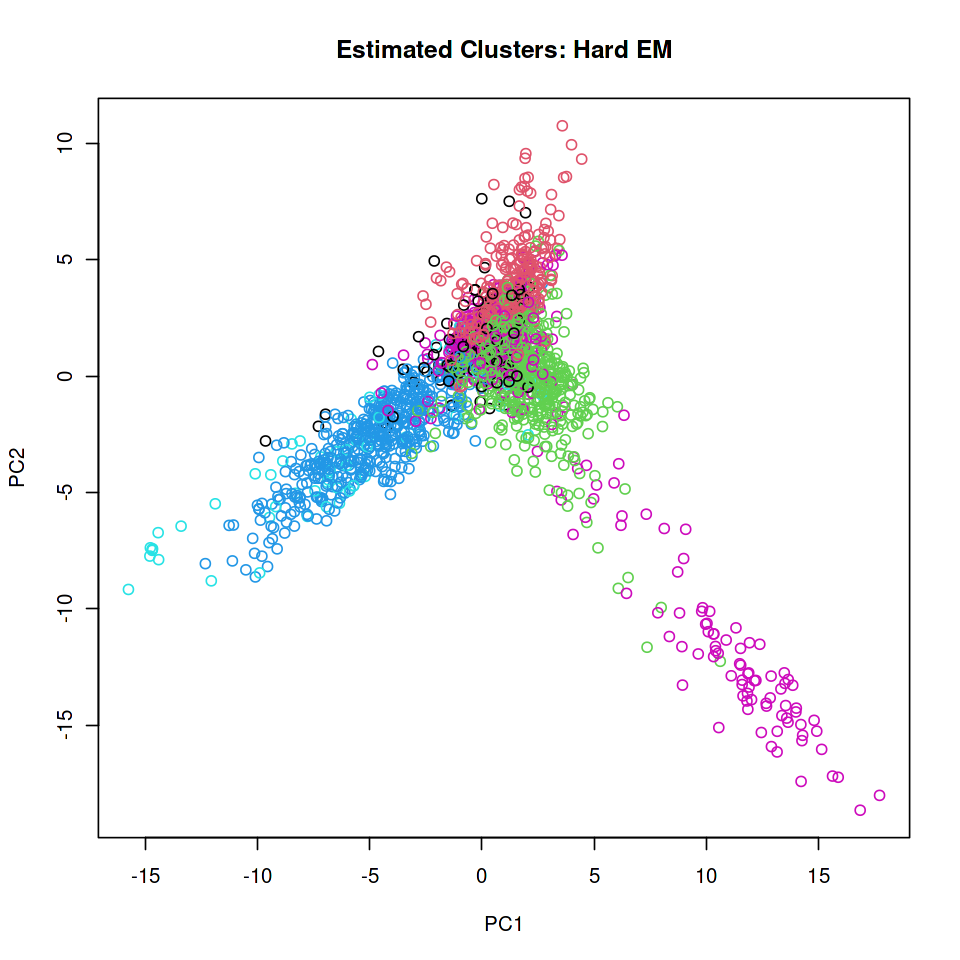

In [19]:
# Setting up the clusters for the hard EM algorithm
label.hard.hat <- apply(res.hard$gamma, 1, which.max)

# Visualizing the stimated clusters for hard-EM
cluster.viz(t(counts), label.hard.hat, 'Estimated Clusters: Hard EM', 6)

In contrast to the plot for Soft EM, we have a better separation between the clusters, and they are spaced nicely in the plot for Hard EM. Let us understand the Hard EM algorithm.

As shown in the derivation in question 1, in Hard EM, each document is assigned one definite cluster. This cluster is chosen based on the maximum probability of that document belonging to any cluster. In other words, the most probable cluster is chosen for each document.

Therefore, we can see the clusters more clearly in the above plot.


**Performance Comparison**:

Now, let us discuss the performance of the two algorithms implemented in the given code. There are
two comparisons to be made here:

- As far as the result of executing the algorithm is concerned, the soft EM algorithm produces clustering which is closer to the original clustering. The fuzziness of the clustering logic applied here allows it to be more sensitive. Since the hard EM algorithm is strict in its assignment of clusters, there is more potential for the clustering to be less identical to the original clustering.

- In terms of processing speed, the hard EM algorithm works much faster than the soft EM algorithm. Since it is definitively selecting one cluster for each document. On the other hand, the soft EM algorithm stores the posterior probabilities for each document concerning every cluster. Therefore, it is slower and takes longer to converge.

## References

* Fitting a Mixture Model Using the Expectation-Maximization Algorithm in R. (n.d.). Tinyheero.github.io. Retrieved October 16, 2022, from https://tinyheero.github.io/2016/01/03/gmm-em.html
* Wikipedia Contributors. (2019a, September 11). Expectation–maximization algorithm. Wikipedia; Wikimedia Foundation.
https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm